# Линейная регрессия и стохастический градиентный спуск

Линейная регрессия - один из методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Вы будете работать с выборкой, содержащей три признака. Для настройки весов модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.

Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\},$$
где $\eta$ - шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть вычислительно сложно. В стохастическом градиентном спуске поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть выполнено аналитически. Вы хотите найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение: 
$$\Large y = Xw.$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw.$$
Теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty.$$
Матрица ${(X^TX)}^{-1}X^T$ - [псевдообратная](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy псевдообратную матрицу можно вычислить с помощью функции [numpy.linalg.pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty.$$
Это может быть сделано с помощью функции [numpy.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html).

Но на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно стохастический.

## Инструкции по выполнению

**1. Загрузим данные из файла.**

In [1]:
import pandas as pd
advertising_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и корреляцию признаков:**

In [2]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


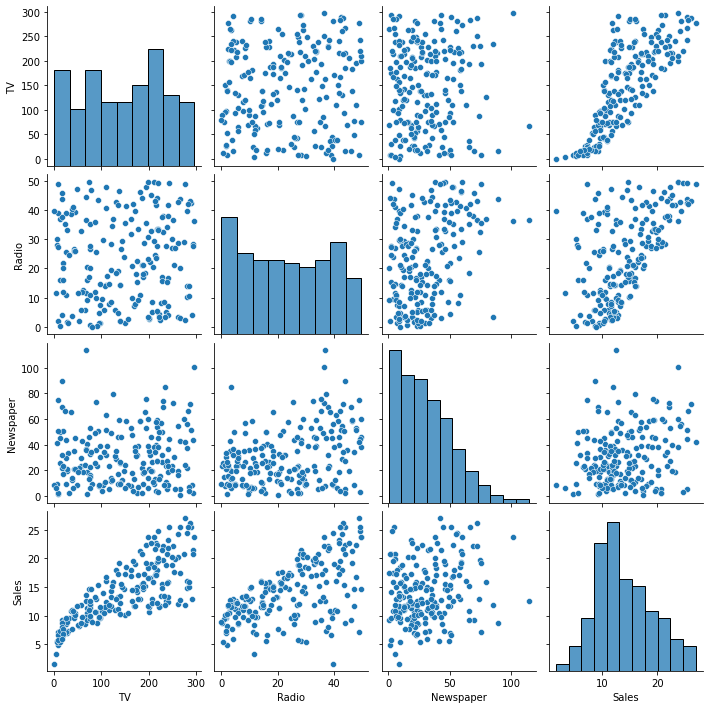

In [3]:
import seaborn as sns
sns.pairplot(advertising_data)

**Создадим массивы NumPy $X$ из столбцов TV, Radio и Newspaper и $y$ - из столбца Sales.**

In [4]:
X = advertising_data[['TV', 'Radio', 'Newspaper']].to_numpy()
y = advertising_data[['Sales']].to_numpy()

**Отмасштабируйте столбцы матрицы $X$, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Обратите внимание, что в NumPy вызов функции `.mean()` без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в Pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр `axis`.**

In [5]:
import numpy as np
means, stds = np.mean(X, axis=0), np.std(X, axis=0)
Xs = np.subtract(X, means)
X = np.divide(Xs, stds)

**Добавьте к матрице $X$ столбец из единиц (смотрите методы `hstack`, `ones` и `reshape` библиотеки NumPy). Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [6]:
X = np.hstack((np.ones((len(X), 1)), X))

**2. Реализуйте функцию `mserror` - среднеквадратичную ошибку прогноза (принимает два аргумента типа Series - значения целевого признака `y` и предсказанные значения `y_pred`). Не используйте в этой функции циклы.**

In [7]:
def mserror(y, y_pred):
    return np.sum((y - y_pred) ** 2) / len(y)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке?**

In [9]:
y_pred = np.array([[np.median(y)] for i in range(len(y))])
mserror(y, y_pred)

28.34575

**3. Реализуйте функцию `normal_equation`, которая по заданным матрицам (массивам NumPy) $X$ и $y$ вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [10]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [11]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[14.0225    ]
 [ 3.91925365]
 [ 2.79206274]
 [-0.02253861]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper)?**

In [12]:
X[0] @ norm_eq_weights

array([20.52397441])

**4. Напишите функцию `linear_prediction`, которая принимает на вход матрицу $X$ и вектор весов линейной модели $w$, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы $X$ с весами $w$.**

In [13]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?**

In [14]:
mserror(y, linear_prediction(X, norm_eq_weights))

2.784126314510936

**5. Напишите функцию `stochastic_gradient_step`, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу $X$, вектора $y$ и $w$, `train_ind` - индекс объекта обучающей выборки (строки матрицы $X$), по которому считается изменение весов, а также `eta` ($\eta$) - шаг градиентного спуска (по умолчанию `eta=0.01`). Результатом будет вектор обновленных весов. Можете написать явно для данных с тремя признаками или же сразу для любого числа признаков.**

In [15]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad = np.array(2 * X[train_ind] * (np.dot(X[train_ind], w) - y[train_ind]) / len(X))[np.newaxis].transpose()
    
    return  w - eta * grad

**6. Напишите функцию `stochastic_gradient_descent`, реализующую стохастический градиентный спуск для линейной регрессии.
Функция принимает на вход следующие аргументы:**
- $X$ - матрица, соответствующая обучающей выборке
- $y$ - вектор значений целевого признака
- `w_init` - вектор начальных весов модели
- `eta` - шаг градиентного спуска (по умолчанию `1E-2`)
- `max_iter` - максимальное число итераций градиентного спуска (по умолчанию `1E4`)
- `max_weight_dist` - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска, при котором алгоритм прекращает работу (по умолчанию `1E-8`)
- `seed` - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию `42`)

**На каждой итерации в список должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также список ошибок.**

In [16]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализация расстояния между векторами весов на соседних итерациях
    weight_dist = np.inf
    # Инициализация вектора весов
    w = w_init
    # Список для записи ошибок на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0

    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # Псевдослучайный индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        new_w = stochastic_gradient_step(X, y, w, random_ind, eta=eta)
        
        errors.append(mserror(y, linear_prediction(X, w)))
        
        weight_dist = np.linalg.norm(new_w - w)
        w = new_w
        
        iter_num += 1
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов `w_init`, состоящий из нулей. Оставьте параметры  `eta` и `seed` равными их значениям по умолчанию (`eta=0.01`, `seed=42`).**

In [17]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init=(np.zeros((4, 1))), max_iter=1E5)

Wall time: 4.84 s


**Ошибка на первых 50 итерациях:**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

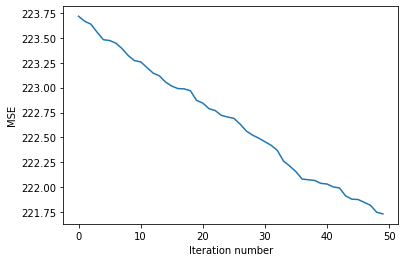

In [18]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Зависимость ошибки от номера итерации для $10^5$ итераций:**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

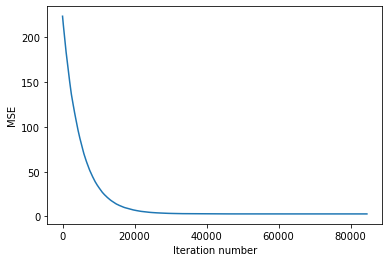

In [19]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**К какому вектору весов сошелся метод:**

In [20]:
stoch_grad_desc_weights

array([[ 1.40190566e+01],
       [ 3.91069256e+00],
       [ 2.78209808e+00],
       [-8.10462217e-03]])

**Среднеквадратичная ошибка на последней итерации:**

In [21]:
stoch_errors_by_iter[-1]

2.784412588352759

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска?**

In [22]:
mserror(y, linear_prediction(X, stoch_grad_desc_weights))

2.7844125884067035